# Laboratorio 1 

**Brandon Sicay - 21757** 

**Daniel Morales - 21785**

Repositorio: https://github.com/DanielMorales1103/IA-lab1

## Task 1
1. Considera un modelo de regresión lineal con dos características, X₁ y, y sus pesos correspondientes w₁ y w₂. Si el modelo predice una salida y mediante la ecuación y = 2w₁X₁ + 3w₂X₂ + 1, ¿cuál es la interpretación del coeficiente 3w₂ en el contexto del modelo?

En el contexto del modelo se puede interpretar que por cada unidad que aumente o disminuya la característica X₂, el resultado y se verá afectado por esa característica en un factor de 3w₂. 

2. Explica el concepto de multicolinealidad en el contexto de la regresión lineal. ¿Cómo afecta la multicolinealidad a la interpretación de los coeficientes de regresión individuales?

La multicolinealidad en el contexto de la regresión lineal es cuando dos o más variables independientes están relacionadas entre sí. La multicolinealidad afecta a la interpretación de las variables por separado debido a que al estar 2 o más variables relacionadas no se sabe la influencia que tiene una sola de estas variables sobre el modelo, ya que la variabilidad de esta variable puede explicar lo mismo que la variabilidad de la otra variable. A su vez los coeficientes de regresión son menos precisos y más sensibles a pequeñas variaciones, por lo que son difíciles de interpretar.  


## Task 2 Clasificación de Sitios de Phishing Regresión Logística y KNN

## Importar las librerías

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder





## Importar el conjunto de datos


In [27]:
path = "dataset_phishing.csv"

data = pd.read_csv(path)

data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


## Verificar si los datos estan balanceados mediante el conteo de instancias para cada clase de nuestra columna objetivo

In [27]:


conteo_clases = data['status'].value_counts() 
# imprime el número de instancias (filas) por cada clase 
print(conteo_clases)




legitimate    5715
phishing      5715
Name: status, dtype: int64


#### Podemos observar que nuestro dataset esta perfectamente balanceado, contando con la misma cantidad de instancias para url's pertenecientes a phising y legítimas


## Codificar datos 


### Codificar la variable dependiente

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder  = LabelEncoder()
status = encoder.fit_transform(data['status'])

print(status)

[0 1 1 ... 0 0 1]


### Feature selection

| URL based features        | Content based features    | External features  |
|---------------------------|---------------------------|--------------------|
| IP - 01                   | hyperlinks int            | whois 01           |
| HTTPS token 01              | external css int          | domain age int     |
| radio of digits float     | login forms 01            | web traffic int    |
| punycode 01               | external favicon 01       | dns record 01      |
| port 01                   | links in tags float       | google index 01    |
| tld 01                    | submit to email 01        |                    |
| abnormal subdomains 01    | invisible iframe 01       |                    |
| subdomains int            | pop up window 01          |                    |
| prefix suffix 01          | right click 01            |                    |
| shortening service 01     | domain in title 01        |                    |
| path extension 01         |                           |                    |
| phish hints int           |                           |                    |
| brand domains 01          |                           |                    |
| statical report 01        |                           |                    |

**Para Variables Binarias (0/1):**

- Encoding: No necesitan encoding adicional ya que ya están en formato numérico.
- Escalado: No se requiere escalado ya que están en un rango  (0, 1).


**Para Variables Numéricas (Int, Float):**

- Encoding: No necesitan encoding ya que son numéricas.
- Escalado: Se usará estandarización (StandardScaler en Scikit-learn)

### Feature Scaling de la variable independiente

In [29]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaled_features = scaler.fit_transform(data[['ratio_digits_url', 'ratio_digits_host', 'nb_subdomains', 'phish_hints', 'nb_hyperlinks', 'nb_extCSS', 'links_in_tags', 'domain_age', 'web_traffic']])
# print(scaled_features)
# features binarias
binary_features = data[['ip', 'https_token', 'punycode' , 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'prefix_suffix', 'shortening_service', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'statistical_report', 'login_form', 'external_favicon', 'submit_email', 'iframe', 'popup_window', 'onmouseover', 'right_clic', 'domain_in_title', 'whois_registered_domain']]

# Combina las características escaladas con las binarias
combined_features = np.concatenate([scaled_features, binary_features], axis=1)
print(combined_features)

[[-0.59465091 -0.26786842  1.20609049 ...  0.          0.
   0.        ]
 [ 1.87605348 -0.26786842 -1.93342541 ...  0.          1.
   0.        ]
 [ 1.09285634 -0.26786842  1.20609049 ...  0.          1.
   0.        ]
 ...
 [ 1.00404016 -0.26786842 -0.36366746 ...  0.          0.
   0.        ]
 [-0.59465091 -0.26786842 -0.36366746 ...  0.          1.
   0.        ]
 [ 0.36724497  8.1428769   1.20609049 ...  0.          1.
   1.        ]]


## Feature Importance


<function matplotlib.pyplot.show(close=None, block=None)>

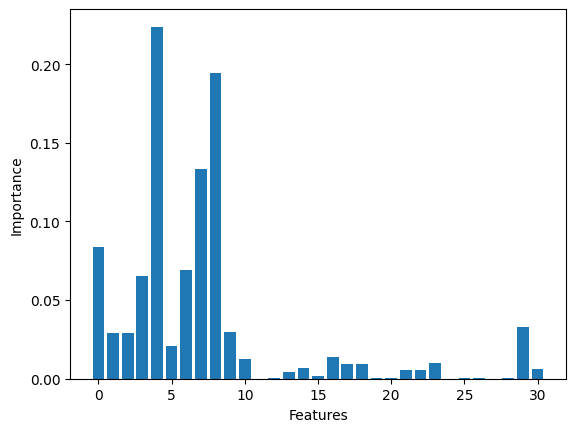

In [30]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Se utilzará la técnica de feature importance, la cual utiliza la métrica de Impureza de Gini, que mide 
# la disminución de la impureza del árbol causada por un feature con el modelo Random Forest

model = RandomForestClassifier()
model.fit(combined_features,status)
# obtener las importancias 
importances = model.feature_importances_

plt.bar(range(combined_features.shape[1]), importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show


In [31]:
# Con esta gráfica obserbamos que el feature en la posición 4(nb_hyperlinks) y en la posición 8(web_traffic) son los 2 features con más importancia en el set de datos.
# Por lo que procedemos a crear un data set nuevo con estos dos features y el status, para tener una visualización de los datos más fácil.

new_DataSet = combined_features[:,[4,8]]
print(new_DataSet)


[[-0.4209257  -0.42934032]
 [-0.34296513 -0.42934032]
 [-0.49888627  2.49161198]
 ...
 [-0.11508038 -0.42933631]
 [-0.33097119  0.8011633 ]
 [-0.39693783 -0.42934032]]


 ## Split para training, testing 

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_DataSet, status, test_size=0.2, random_state=1)

In [47]:
print(X_train)

[[-0.21702882  2.43065339]
 [-0.52287414 -0.42934032]
 [-0.19304095 -0.42827894]
 ...
 [-0.39693783 -0.42934032]
 [-0.21103185 -0.42933932]
 [-0.26500456  0.23366223]]


In [53]:
print(X_test)

[[ 1.39615531 -0.42900958]
 [-0.3849439  -0.42934032]
 [-0.52287414 -0.42932979]
 ...
 [-0.4209257  -0.38953713]
 [-0.51687717 -0.39844259]
 [-0.34896209 -0.42901258]]


## Grafico

## Task 2.1 - Regresión Logística

### Implementación desde cero

In [24]:
import numpy as np

# Función Sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función de Costo
def compute_cost(X, y, weights):
    m = X.shape[0]
    h = sigmoid(X @ weights)
    epsilon = 1e-5  # para evitar log(0)
    cost = (-1/m) * ((y.T @ np.log(h + epsilon)) + ((1 - y).T @ np.log(1 - h + epsilon)))
    return cost

# Gradiente Descendente
def gradient_descent(X, y, weights, learning_rate, epochs):
    m = X.shape[0]
    cost_history = []
    
    for i in range(epochs):
        h = sigmoid(X @ weights)
        gradient = np.dot(X.T, (h - y)) / m
        weights -= learning_rate * gradient
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)
        
    return weights, cost_history


Accuracy: 0.7502187226596675


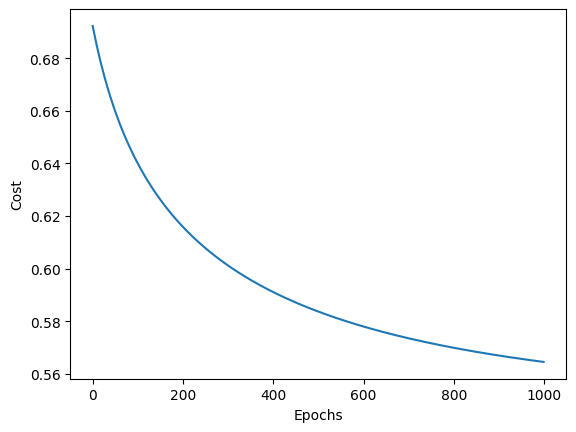

In [62]:
# Métrica de Desempeño
def predict(X, weights):
    y_pred = sigmoid(X @ weights)
    return [1 if i > 0.5 else 0 for i in y_pred]

# Asegurándonos de agregar el término de intercepción
X_train_with_intercept = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1)
X_test_with_intercept = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)

# Inicializar los pesos
weights = np.zeros(X_train_with_intercept.shape[1])

# Hiperparámetros
learning_rate = 0.03
epochs = 1000

# Entrenamiento del modelo
weights, cost_history = gradient_descent(X_train_with_intercept, y_train, weights, learning_rate, epochs)

# Predicciones
y_pred = predict(X_test_with_intercept, weights)

# Calculando la precisión
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')
# Grafico del costo a lo largo de las iteraciones
plt.plot(cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

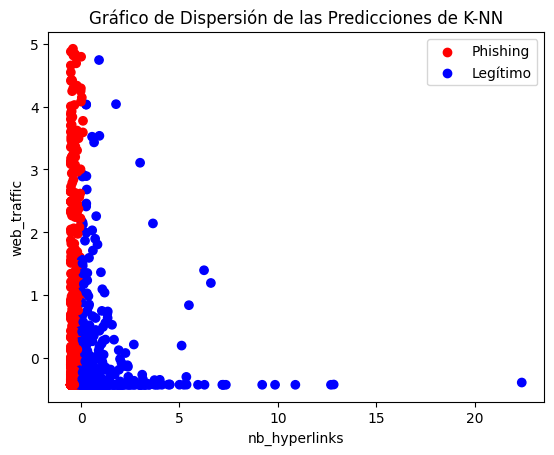

In [70]:


# Gráfico de grupos encontrados

import matplotlib.pyplot as plt

# Gráfico de grupos encontrados
x = X_test[:, 0]
y = X_test[:, 1]
colors = ['red' if label == 1 else 'blue' for label in y_pred]

# Crear dos scatter plots para la leyenda
for color in ['red', 'blue']:
    plt.scatter([], [], color=color, label='Phishing' if color == 'red' else 'Legítimo')

# Crear el scatter plot real
plt.scatter(x, y, color=colors)

plt.title('Gráfico de Dispersión de las Predicciones de K-NN')
plt.xlabel('nb_hyperlinks')
plt.ylabel('web_traffic')

plt.legend()

plt.show()


### Implementación con Librerías


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Suponiendo que X_train, Y_train, X_test, Y_test ya están definidos

# Crear una instancia del modelo
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
predictions = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print(f"Exactitud del Modelo: {accuracy}")



Exactitud del Modelo: 0.7629046369203849


Respecto a la selección de la métrica de desempeño, se seleccionó accuracy, al ser más fácil y directa de interpretar, así como era perfecta para el dataset con el que se contaba, donde los datos estaban perfectamente balanceados.

**¿Cuál implementación fue mejor? ¿Por qué?**

Al comprar la implementación propia contra la implementación de la libería sklearn, se tuvo que la predicción de la implementación de la librería es de 0.76 y la implementación propia es de 0.75. Esto, además de los procesos que incluye sklearn, puede deberse a los hiperparámetros. El learning rate y el número de épocas que se escogieron, son valores estimados a prueba y error, y podrían no ser los óptimos para el modelo. Scikit-learn ajusta estos internamente basados en sus algoritmos de optimización.


## Task 2.2 K-Nearest Neighbors

### Implementación de K-NN

In [75]:
cantidad_prediccion = len(X_test)
# Función para obtener la distancia entre puntos dada por la forma de la distancia Euclidiana
def euclidean_distance(X1, X2):
    return np.sqrt(np.sum((X1 - X2) ** 2))

def Knn(x_train, y_train, test_row, k):
    distances = []
    for i, train_row in enumerate(x_train):
        dist = euclidean_distance(test_row, train_row)
        distances.append((y_train[i], dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = distances[:k]
    return neighbors

def predict_classification(x_train, y_train, test_row, k):
    neighbors = Knn(x_train, y_train, test_row, k)
    outputs = [row[0] for row in neighbors]
    prediction = max(set(outputs), key=outputs.count)
    return prediction

k = 3
#prediction = predict_classification(X_train,y_train,[-0.44491357 -0.42934032],k)
prediction = [predict_classification(X_train,y_train,test_row,k) for test_row in X_test[0:cantidad_prediccion]]


In [76]:
# Métrica de desempeño
from sklearn.metrics import accuracy_score
accurancy = accuracy_score(y_test[:cantidad_prediccion], prediction)
print("precision: ",accurancy)

precision:  0.8451443569553806


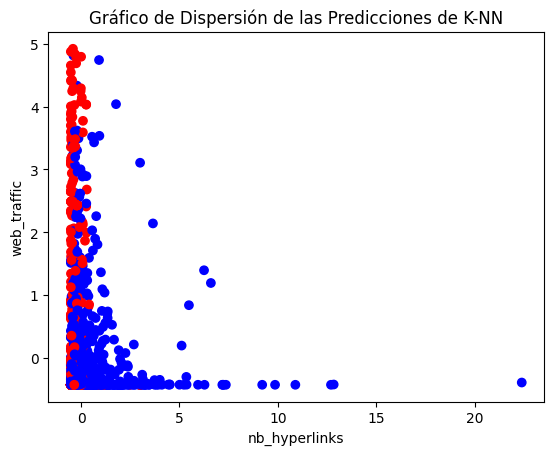

In [77]:
# Gráfico de grupos encontrados
x = X_test[:cantidad_prediccion, 0] 
y = X_test[:cantidad_prediccion, 1]
colors = ['red' if label == 1 else 'blue' for label in prediction]
plt.scatter(x, y, color=colors)
plt.title('Gráfico de Dispersión de las Predicciones de K-NN')
plt.xlabel('nb_hyperlinks')
plt.ylabel('web_traffic')
plt.show()

### Utilizando librerias

Precisión con Scikit-learn: 0.8342082239720034


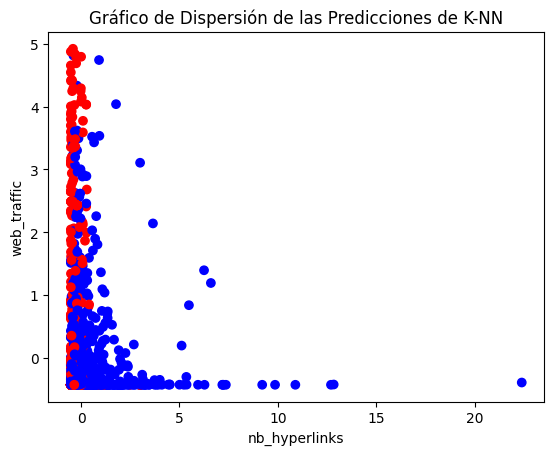

In [78]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

predictions_sklearn = knn.predict(X_test[:cantidad_prediccion])
accuracy_sklearn = accuracy_score(y_test[:cantidad_prediccion], predictions_sklearn)
print("Precisión con Scikit-learn:", accuracy_sklearn)

# Gráfico de grupos encontrados
x = X_test[:cantidad_prediccion, 0] 
y = X_test[:cantidad_prediccion, 1]
colors = ['red' if label == 1 else 'blue' for label in prediction]
plt.scatter(x, y, color=colors)
plt.title('Gráfico de Dispersión de las Predicciones de K-NN')
plt.xlabel('nb_hyperlinks')
plt.ylabel('web_traffic')
plt.show()

Respecto a la selección de la métrica de desempeño, se seleccionó accuracy, por ser más fácil interpretar, así como era perfecta para un dataset balanceado como con el que se trabajó.

**¿Cuál implementación fue mejor? ¿Por qué?**

Al comparar las dos implementaciones nos damos cuenta que la implementación desde 0 tiene un accuracy de 0.845 y con la implementación con librerías tenemos un accuracy de 0.834. Notamos que la diferencia entre ambas es muy pequeña, aproximadamente 0.01 de diferencia. A pesar de la pequeña diferencia podemos decir que la implementación desde 0 fue mejor que la implementación con librería. Esto puede deberse a la naturaleza de los datos y en la forma en que se manejaron internamente en la librería, puede que al utilizar todos los decimales posibles en el cálculo de la distancía haya favorecido a la implementación desde 0. 
